# 测试集语义特征t-SNE降维可视化

抽取Pytorch训练得到的图像分类模型中间层的输出特征，作为输入图像的语义特征。

计算测试集所有图像的语义特征，使用t-SNE和UMAP两种降维方法降维至二维和三维，可视化。

分析不同类别的语义距离、异常数据、细粒度分类、高维数据结构。

## 设置matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [4]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf: 没有那个文件或目录


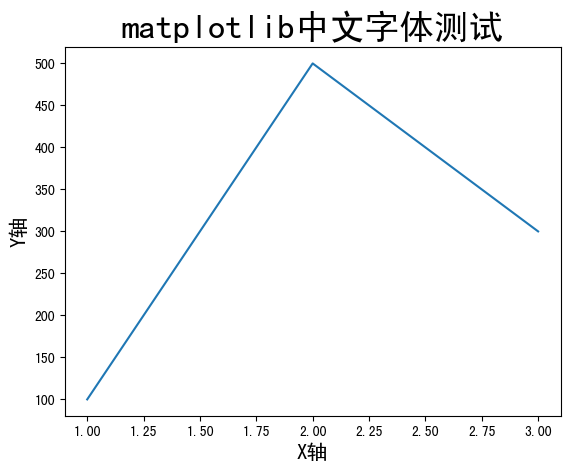

In [5]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入工具包

In [35]:
import numpy as np
import pandas as pd
import cv2
# dataset_name = 'test_easy_classes'
dataset_name = 'test_hard_classes'
model_path = './models/2023-10-09-01-47_max_epoch_100/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入测试集图像语义特征

In [36]:
encoding_array = np.load(model_path + dataset_name + '-测试集语义特征.npy', allow_pickle=True)

In [37]:
encoding_array.shape

(3000, 1280)

## 载入测试集图像分类结果

In [38]:
df = pd.read_csv(model_path + dataset_name + '-测试集预测结果.csv')

In [39]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,covering-预测置信度,device-预测置信度,domestic_animal-预测置信度,mater-预测置信度,person-预测置信度,plant-预测置信度,structure-预测置信度,vertebrate-预测置信度
0,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,4,person,3,mater,True,0.801112,0.006859,0.002550,0.015600,0.158353,0.006221,0.005665,0.003641
1,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,6,structure,3,mater,0,covering,True,0.113383,0.027640,0.006023,0.259255,0.044438,0.006826,0.538320,0.004116
2,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,4,person,2,domestic_animal,True,0.600943,0.008280,0.050587,0.032752,0.277345,0.005105,0.013126,0.011862
3,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,3,mater,1,device,False,0.017682,0.046715,0.005153,0.087193,0.813342,0.003787,0.019615,0.006513
4,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,3,mater,4,person,True,0.681542,0.039885,0.012647,0.156968,0.054006,0.019469,0.012044,0.023439


In [40]:
classes = df['标注类别名称'].unique()
print(classes)

['covering' 'device' 'domestic_animal' 'mater' 'person' 'plant'
 'structure' 'vertebrate']


## 可视化配置

In [41]:
import seaborn as sns
marker_list = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [42]:
class_list = np.unique(df['标注类别名称'])

In [43]:
class_list

array(['covering', 'device', 'domestic_animal', 'mater', 'person',
       'plant', 'structure', 'vertebrate'], dtype=object)

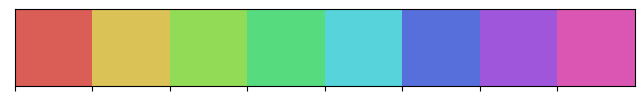

In [44]:
n_class = len(class_list) # 测试集标签类别数
palette = sns.hls_palette(n_class) # 配色方案
sns.palplot(palette)

In [45]:
# 随机打乱颜色列表和点型列表¶
import random
random.seed(1234)
random.shuffle(marker_list)
random.shuffle(palette)

## t-SNE降维至二维

In [46]:
# 降维到二维和三维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=20000)
X_tsne_2d = tsne.fit_transform(encoding_array)

In [47]:
X_tsne_2d.shape

(3000, 2)

## 可视化展示

In [48]:
# 不同的 符号 表示 不同的 标注类别
show_feature = '标注类别名称'

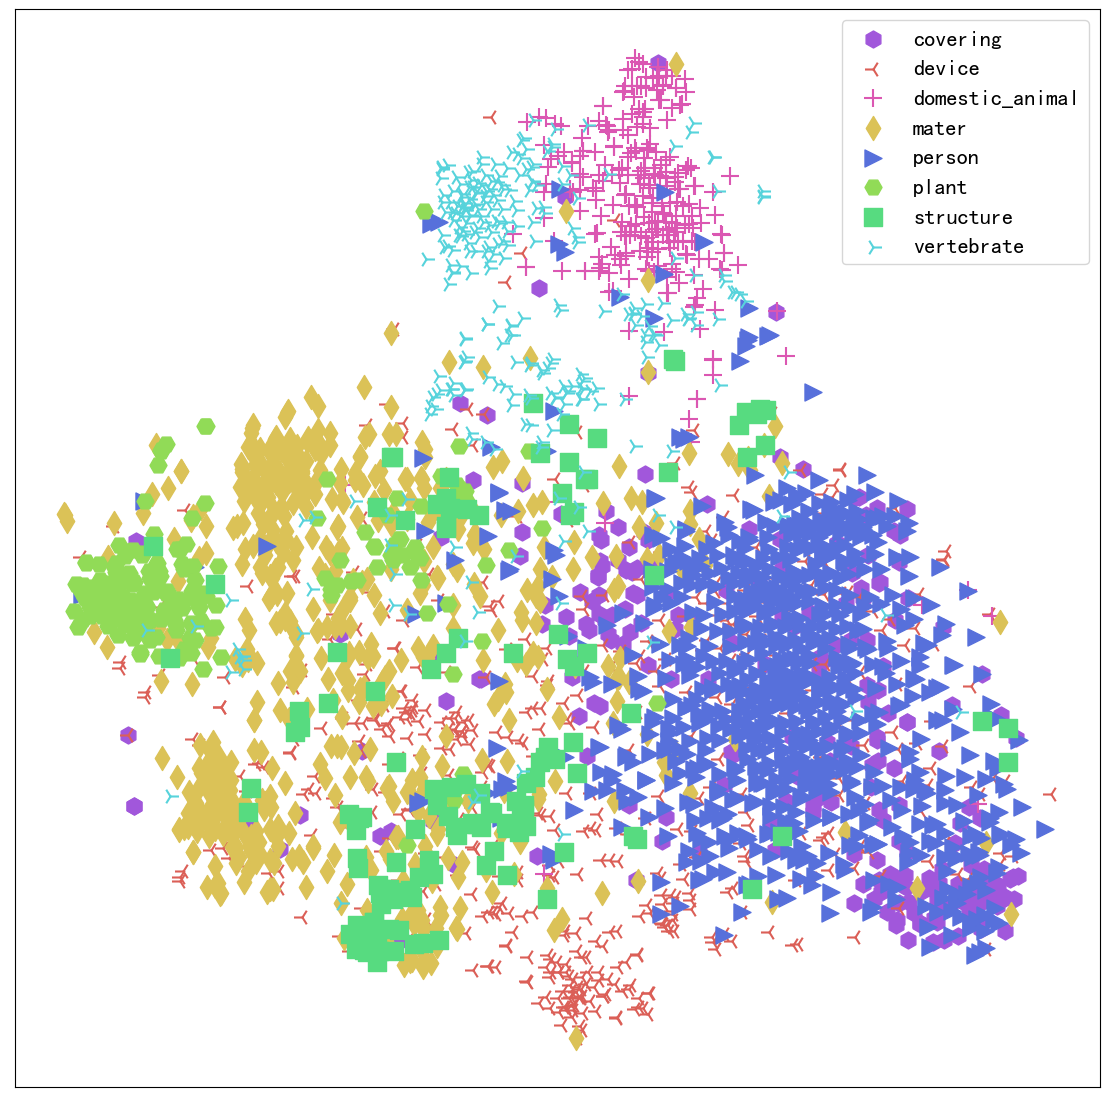

In [49]:
plt.figure(figsize=(14, 14))
for idx, fruit in enumerate(class_list): # 遍历每个类别
    # 获取颜色和点型
    color = palette[idx]
    marker = marker_list[idx%len(marker_list)]

    # 找到所有标注类别为当前类别的图像索引号
    indices = np.where(df[show_feature]==fruit)
    plt.scatter(X_tsne_2d[indices, 0], X_tsne_2d[indices, 1], color=color, marker=marker, label=fruit, s=150)

plt.legend(fontsize=16, markerscale=1, bbox_to_anchor=(1, 1))
plt.xticks([])
plt.yticks([])
plt.savefig(dataset_name + '-语义特征t-SNE二维降维可视化.pdf', dpi=300) # 保存图像
plt.show()

## plotply交互式可视化

In [50]:
import plotly.express as px

In [51]:
df_2d = pd.DataFrame()
df_2d['X'] = list(X_tsne_2d[:, 0].squeeze())
df_2d['Y'] = list(X_tsne_2d[:, 1].squeeze())
df_2d['标注类别名称'] = df['标注类别名称']
df_2d['预测类别'] = df['top-1-预测名称']
df_2d['图像路径'] = df['图像路径']
df_2d.to_csv(dataset_name + '-t-SNE-2D.csv', index=False)

In [52]:
df_2d

,X,Y,标注类别名称,预测类别,图像路径
0,55.362068,-37.902657,covering,covering,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
1,4.660138,14.758120,covering,structure,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
2,39.284519,17.591677,covering,covering,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
3,6.234807,-25.669428,covering,person,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
4,-8.016846,14.091105,covering,covering,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
...,...,...,...,...,...
2995,20.797058,48.675632,vertebrate,vertebrate,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
2996,-12.896070,54.844727,vertebrate,vertebrate,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
2997,-13.997553,2.428593,vertebrate,person,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
2998,-14.699417,27.578012,vertebrate,mater,data/SOD-SemanticDataset/test/COME15K-Hard/COM...


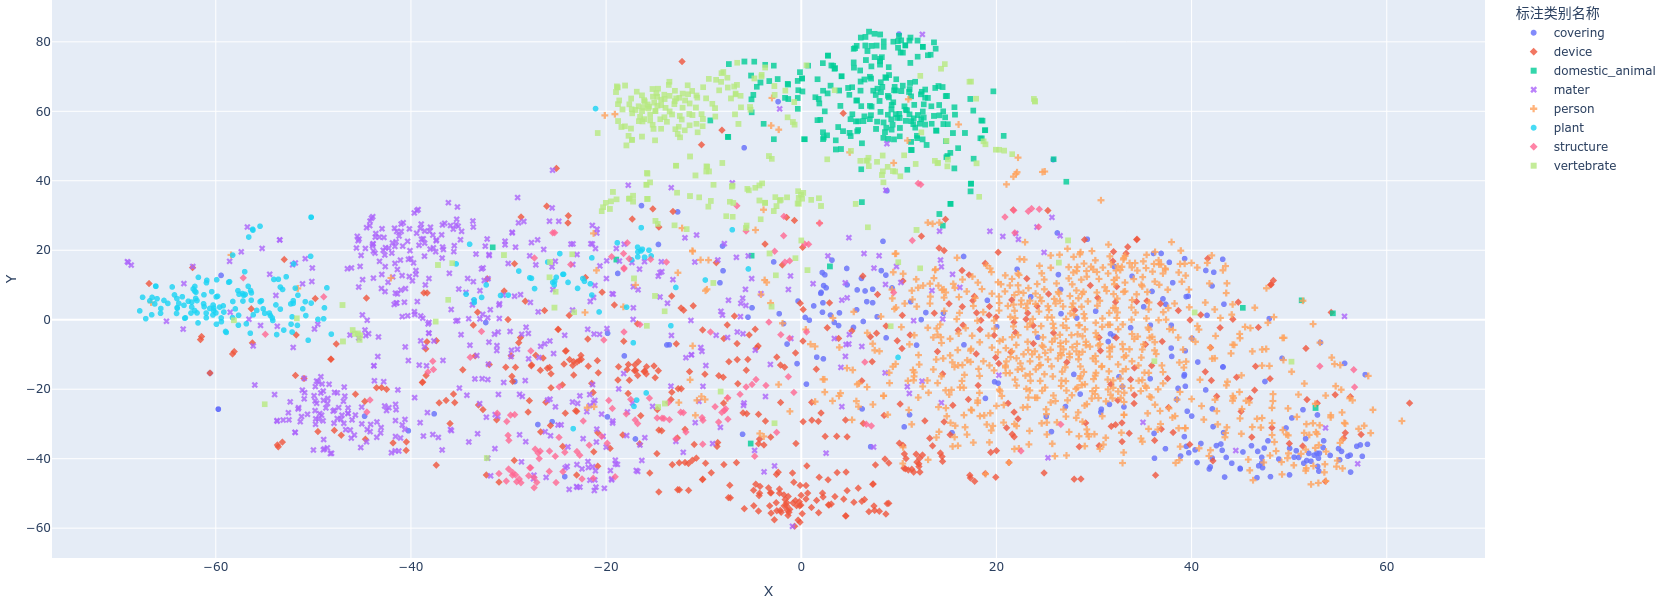

In [53]:
fig = px.scatter(df_2d, 
                 x='X', 
                 y='Y',
                 color=show_feature, 
                 labels=show_feature,
                 symbol=show_feature, 
                 hover_name='图像路径',
                 opacity=0.8,
                 width=1000, 
                 height=600
                )
# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html(dataset_name + '-语义特征t-SNE二维降维plotly可视化.html')

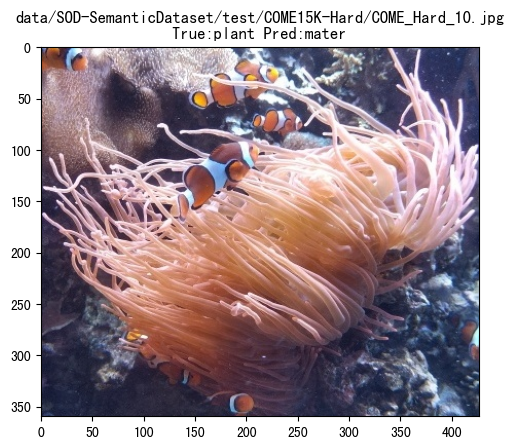

In [55]:
# 查看图像
img_path_temp = 'data/SOD-SemanticDataset/test/COME15K-Hard/COME_Hard_10.jpg'
img_bgr = cv2.imread(img_path_temp)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
temp_df = df[df['图像路径'] == img_path_temp]
title_str = img_path_temp + '\nTrue:' + temp_df['标注类别名称'].item() + ' Pred:' + temp_df['top-1-预测名称'].item()
plt.title(title_str)
plt.show()

## t-SNE降维至三维，并可视化

In [56]:
# 降维到三维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=10000)
X_tsne_3d = tsne.fit_transform(encoding_array)

In [57]:
X_tsne_3d.shape

(3000, 3)

In [58]:
show_feature = '标注类别名称'
# show_feature = '预测类别'

In [59]:
df_3d = pd.DataFrame()
df_3d['X'] = list(X_tsne_3d[:, 0].squeeze())
df_3d['Y'] = list(X_tsne_3d[:, 1].squeeze())
df_3d['Z'] = list(X_tsne_3d[:, 2].squeeze())
df_3d['标注类别名称'] = df['标注类别名称']
df_3d['预测类别'] = df['top-1-预测名称']
df_3d['图像路径'] = df['图像路径']
df_3d.to_csv(dataset_name + '-t-SNE-3D.csv', index=False)

In [60]:
df_3d

,X,Y,Z,标注类别名称,预测类别,图像路径
0,-17.599825,-40.830341,11.974364,covering,covering,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
1,-14.881394,2.850384,-0.287272,covering,structure,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
2,-11.140079,-0.794150,35.008198,covering,covering,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
3,-1.226301,-17.751781,-12.888285,covering,person,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
4,-29.680405,2.887409,17.449799,covering,covering,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
...,...,...,...,...,...,...
2995,-25.027889,13.834392,13.961905,vertebrate,vertebrate,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
2996,-1.695771,31.626110,0.674159,vertebrate,vertebrate,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
2997,-13.534350,41.321632,-5.885708,vertebrate,person,data/SOD-SemanticDataset/test/COME15K-Hard/COM...
2998,2.225243,24.700304,-11.466475,vertebrate,mater,data/SOD-SemanticDataset/test/COME15K-Hard/COM...


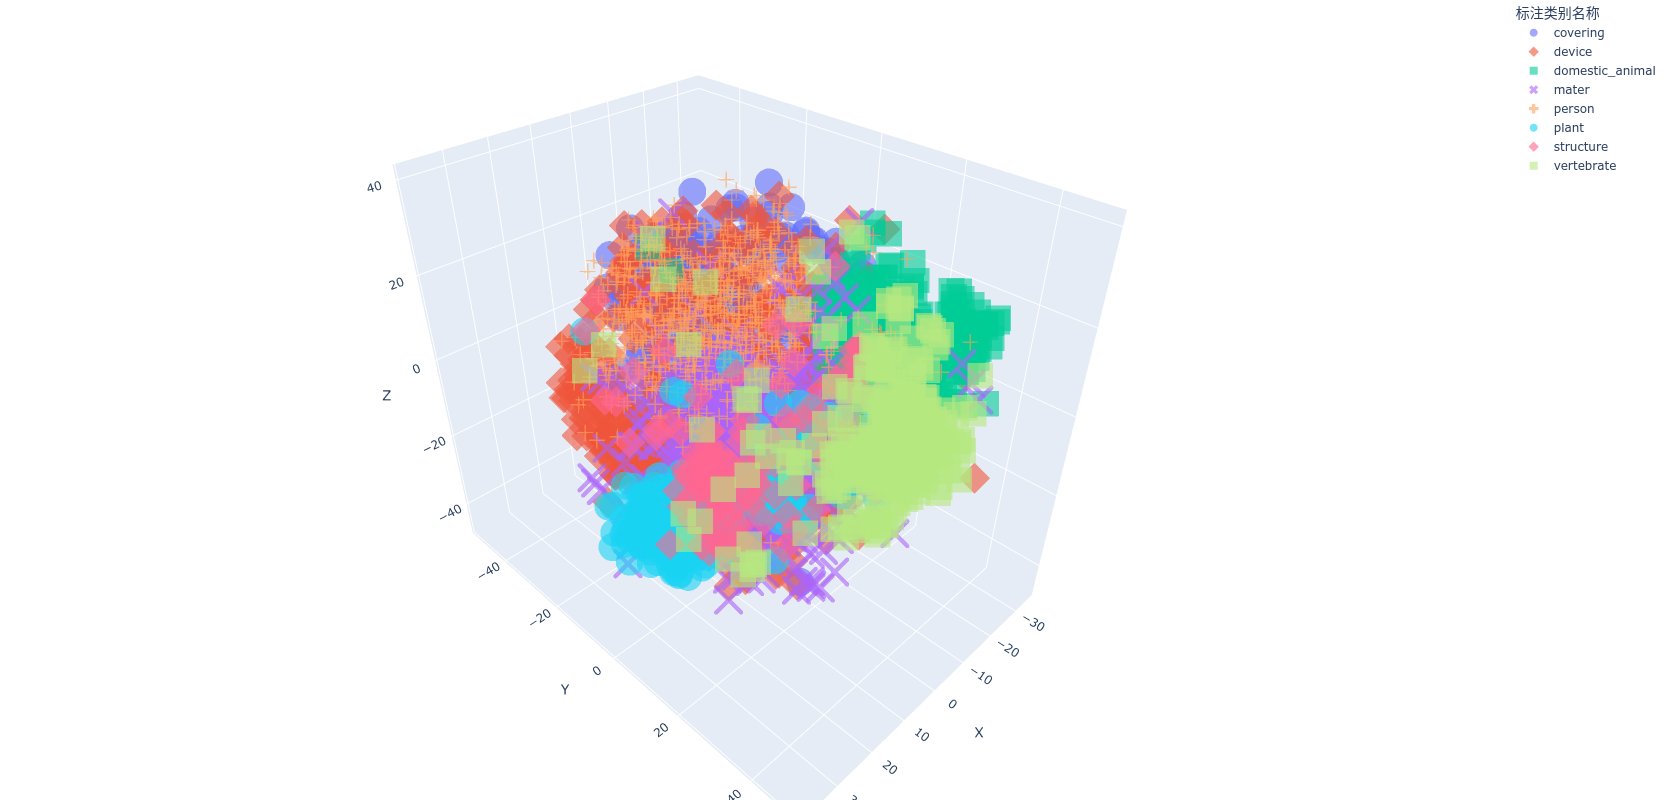

In [61]:
fig = px.scatter_3d(df_3d, 
                    x='X', 
                    y='Y', 
                    z='Z',
                    color=show_feature, 
                    labels=show_feature,
                    symbol=show_feature, 
                    hover_name='图像路径',
                    opacity=0.6,
                    width=1000, 
                    height=800)

# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html(dataset_name + '-语义特征t-SNE三维降维plotly可视化.html')